In [2]:
import numpy as np
import math as m
import random
import timeit
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special

In [3]:
##Busqueda binaria con listas

#Lista estrictamente creciente
lista = [1,2,3,4,5,6,7,8,9,10,11]

def busquedaBinaria(ls,n):
    #Precondicion: n pertenece a ls
    mitad = m.floor(len(ls) /2)
    if(ls[mitad] == n):
        return n
    else:
        if(ls[mitad]> n):
            return busquedaBinaria(ls[0:mitad],n)
        else:
            return busquedaBinaria(ls[mitad:],n) #mitad: es desde la mitad hasta el final
        
for i in lista:
    print(busquedaBinaria(lista,i))

1
2
3
4
5
6
7
8
9
10
11


In [4]:
##Busqueda ternaria con listas

#Lista estrictamente creciente
lista = [1,2,3,4,5,6,7,8,9,10]

def busquedaLineal(ls,n):
    #Precondicion: n pertenece a ls
    for x in ls:
        if(x==n):
            return n

def busquedaTernaria(ls,n):
    #Precondicion: n pertenece a ls
    if(len(ls) <=6):
        return busquedaLineal(ls,n) #O(1) porque a lo sumo va a ser O(3)
    primerTercio = m.floor(len(ls) /3)
    segundoTercio = primerTercio * 2
    if(ls[primerTercio] == n):
        return n
    else:
        if(ls[primerTercio] > n):
            return busquedaTernaria(ls[0:primerTercio],n)
        elif(ls[segundoTercio] > n):
            return busquedaTernaria(ls[primerTercio:segundoTercio],n)
        else:return busquedaTernaria(ls[segundoTercio:],n)
                
        
for i in lista:
    print(busquedaTernaria(lista,i))

1
2
3
4
5
6
7
8
9
10


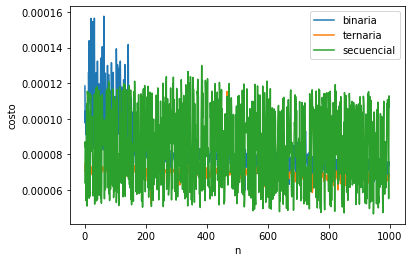

In [10]:
n_min=1
n_max=1000
iteraciones = 10
st=1
precision_tiempo = 1


t_binaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    v = random.sample(range(1, n_max), n)[0]
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaBinaria(list(range(1,n_max)),v), number = precision_tiempo)
    promedio = suma / iteraciones
    t_binaria.append(promedio)
#print(t_binaria_1)

t_ternaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    v = random.sample(range(1, n_max), n)[0]
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaTernaria(list(range(1,n_max)),v), number = precision_tiempo)
    promedio = suma / iteraciones
    t_ternaria.append(promedio)
    
t_secuencial = list()
for n in range(n_min, n_max, st):
    suma = 0
    v = random.sample(range(1, n_max), n)[0]
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaLineal(list(range(1,n_max)),v), number = precision_tiempo)
    promedio = suma / iteraciones
    t_secuencial.append(promedio)

eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_binaria, label = 'binaria')
plt.plot(eje_x, t_ternaria, label = 'ternaria')
plt.plot(eje_x, t_secuencial, label = 'secuencial')
plt.xlabel('n')
plt.ylabel('costo')

plt.legend()





## Comentarios: 

Implemente también busquedaLineal para compararla contra las demas busquedas y usarla como caso base en la ternaria sin afectar linealmente la complejidad

El plot de arriba corresponde a "mezclar" los casos posibles. Me parece que un análisis mas certero seria el de abajo, donde queda demostrado por ejemplo, que si el valor a encontrar es 30 en 1000, gana la Lineal, pero si el valor se acerca mas a 1000 (en particular si v>300 aprox) la busqueda ternaria es mas performante

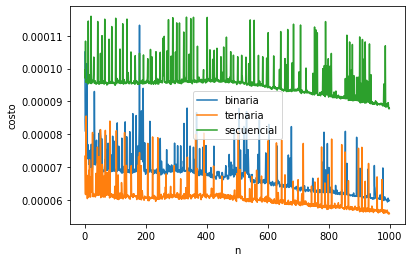

In [13]:
#Muestra de todas las funciones buscando 900

n_min=1
n_max=1000
iteraciones = 4
st=1
precision_tiempo = 1
v = 900

t_binaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaBinaria(list(range(1,n_max)),v), number = precision_tiempo)
    promedio = suma / iteraciones
    t_binaria.append(promedio)
#print(t_binaria_1)

t_ternaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaTernaria(list(range(1,n_max)),v), number = precision_tiempo)
    promedio = suma / iteraciones
    t_ternaria.append(promedio)
    
t_secuencial = list()
for n in range(n_min, n_max, st):
    suma = 0
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaLineal(list(range(1,n_max)),v), number = precision_tiempo)
    promedio = suma / iteraciones
    t_secuencial.append(promedio)

eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_binaria, label = 'binaria')
plt.plot(eje_x, t_ternaria, label = 'ternaria')
plt.plot(eje_x, t_secuencial, label = 'secuencial')
plt.xlabel('n')
plt.ylabel('costo')

plt.legend()





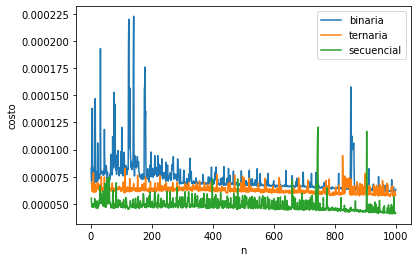

In [14]:
#Muestra de todas las funciones buscando 30

n_min=1
n_max=1000
iteraciones = 4
st=1
precision_tiempo = 1
v = 30

t_binaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaBinaria(list(range(1,n_max)),v), number = precision_tiempo)
    promedio = suma / iteraciones
    t_binaria.append(promedio)
#print(t_binaria_1)

t_ternaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaTernaria(list(range(1,n_max)),v), number = precision_tiempo)
    promedio = suma / iteraciones
    t_ternaria.append(promedio)
    
t_secuencial = list()
for n in range(n_min, n_max, st):
    suma = 0
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaLineal(list(range(1,n_max)),v), number = precision_tiempo)
    promedio = suma / iteraciones
    t_secuencial.append(promedio)

eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_binaria, label = 'binaria')
plt.plot(eje_x, t_ternaria, label = 'ternaria')
plt.plot(eje_x, t_secuencial, label = 'secuencial')
plt.xlabel('n')
plt.ylabel('costo')

plt.legend()





Aca una muestra con el valor creciente de busqueda, se puede apreciar el punto de encuentro de todas las funciones.


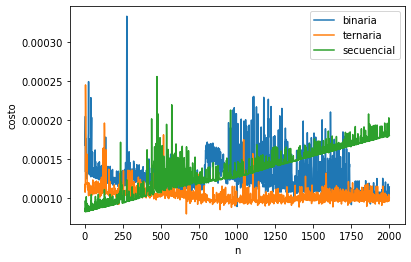

In [8]:
#Muestra con v incremental

n_min=1
n_max=2000
iteraciones = 4
st=1
precision_tiempo = 1

t_binaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaBinaria(list(range(1,n_max)),n), number = precision_tiempo)
    promedio = suma / iteraciones
    t_binaria.append(promedio)
#print(t_binaria_1)

t_ternaria = list()
for n in range(n_min, n_max, st):
    suma = 0
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaTernaria(list(range(1,n_max)),n), number = precision_tiempo)
    promedio = suma / iteraciones
    t_ternaria.append(promedio)
    
t_secuencial = list()
for n in range(n_min, n_max, st):
    suma = 0
    for foo in range(1,iteraciones):
        suma += timeit.timeit(lambda: busquedaLineal(list(range(1,n_max)),n), number = precision_tiempo)
    promedio = suma / iteraciones
    t_secuencial.append(promedio)

eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_binaria, label = 'binaria')
plt.plot(eje_x, t_ternaria, label = 'ternaria')
plt.plot(eje_x, t_secuencial, label = 'secuencial')
plt.xlabel('n')
plt.ylabel('costo')

plt.legend()



